# Introduction

Malaria is caused by Plasmodium parasites. The parasites are spread to people through the bites of infected female Anopheles mosquitoes, called "malaria vectors." There are 5 parasite species that cause malaria in humans, and 2 of these species – P. falciparum and P. vivax – pose the greatest threat. Despite this, malaria is preventable and curable.

In 2018, there were an estimated 228 million cases of malaria worldwide.The estimated number of malaria deaths stood at 405 000 in 2018.

The WHO African Region continues to carry a disproportionately high share of the global malaria burden. In 2018, the region was home to 93% of malaria cases and 94% of malaria deaths.

In 2018, 6 countries accounted for more than half of all malaria cases worldwide: Nigeria (25%), the Democratic Republic of the Congo (12%), Uganda (5%), and Côte d’Ivoire, Mozambique and Niger (4% each).

Children under 5 years of age are the most vulnerable group affected by malaria; in 2018, they accounted for 67% (272 000) of all malaria deaths worldwide.

Healthcare services in sub-saharan African countries could greatly benefit from the advantages that automation brings. The rapid and accurate processing of patient data can aleviate the financial strain placed on healthcare systems and also assist in the shortage of skilled personel that many countries face in various branches of medicine.

                       source World Health Organization  --> https://www.who.int/en/news-room/fact-sheets/detail/malaria


# Challenges with Diagnosis 

Where malaria is not endemic any more (such as in the United States), health-care providers may not be familiar with the disease. Clinicians seeing a malaria patient may forget to consider malaria among the potential diagnoses and not order the needed diagnostic tests. Laboratorians may lack experience with malaria and fail to detect parasites when examining blood smears under the microscope.
Malaria is an acute febrile illness. In a non-immune individual, symptoms usually appear 10–15 days after the infective mosquito bite. The first symptoms – fever, headache, and chills – may be mild and difficult to recognize as malaria. If not treated within 24 hours, P. falciparum malaria can progress to severe illness, often leading to death.

Malaria parasites can be identified by examining under the microscope a drop of the patient’s blood, spread out as a “blood smear” on a microscope slide. Prior to examination, the specimen is stained to give the parasites a distinctive appearance. This technique remains the gold standard for laboratory confirmation of malaria. However, it depends on the quality of the reagents, of the microscope, and on the experience of the laboratorian.

# Steps to solve the problem :-

* Importing Libraries.
* Loading the data.
* Data preprocessing and data augmentation.
* Ploting images and its labels to distinguish infected vs normal cells
* Spliting data in Training , Evaluation and Testing sets.
* Creating a Sequential Neural Network.
* Training the data on Train data.
* Evaluating on evaluation data.
* Predicting on Test data
* Plotting the learning curves
* Ploting the predicted image and its respective True value and predicted value.

In [1]:
# Importing the relevant libraries
from tensorflow.keras.layers import MaxPooling2D, SeparableConv2D,BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Dense,Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from skimage.filters import prewitt_h,prewitt_v
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,  plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from imutils import paths
import skimage
from tensorflow.keras import Sequential
import itertools


In [2]:
# reading in the dataset

dataset = r'C:\Users\animu\Downloads\malaria\Data'

# creating a dictionary to store and iterate through the dataset
args = {}
args['dataset'] = dataset


# separating the data features from the labels and storing them in lists


ipaths = list(paths.list_images(args['dataset']))
features = []
labels = []
for i in ipaths:
    label = i.split(os.path.sep)[-2]
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64,64))

    labels.append(label)
    features.append(image)

data = np.array(features)/255.0
labels = np.array(labels)


Malaria Parasitized vs Uninfected Red Blood Cell


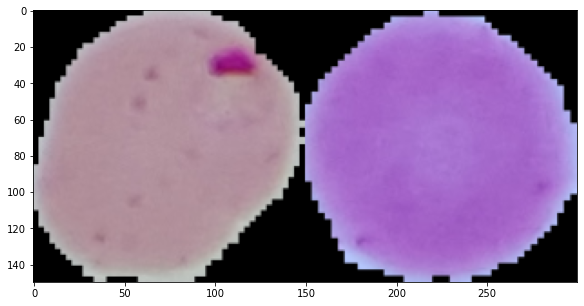

Malaria Parasitized vs Uninfected Red Blood Cell


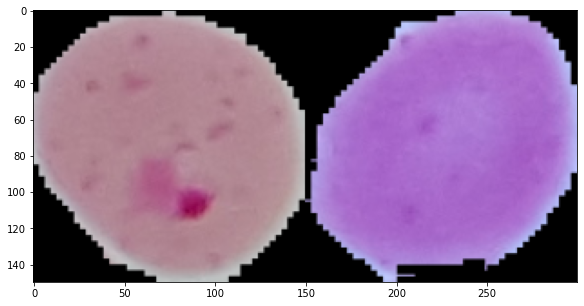

Malaria Parasitized vs Uninfected Red Blood Cell


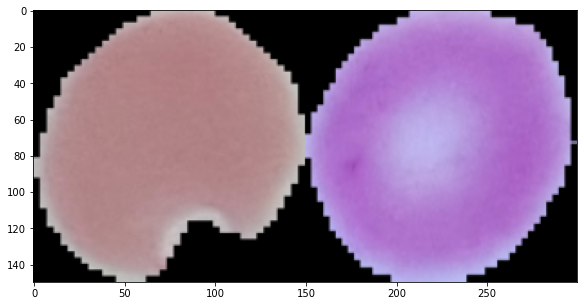

Malaria Parasitized vs Uninfected Red Blood Cell


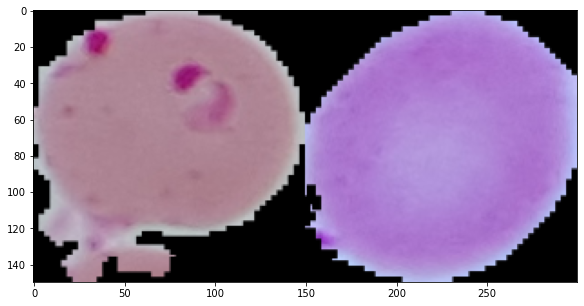

Malaria Parasitized vs Uninfected Red Blood Cell


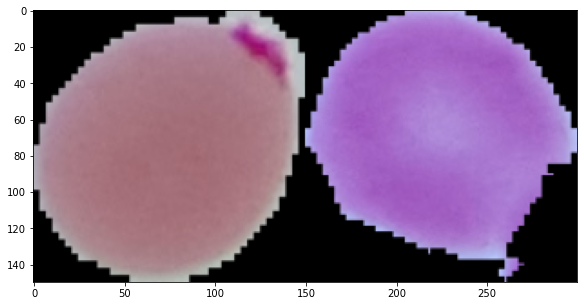

In [3]:
# Visualizing the data

infected_images = os.listdir(dataset + '/Malaria/')
normal_images = os.listdir(dataset + '/Normal/')

def cell_image_plotter(i):
    uninfected = cv2.imread(dataset + '//Normal//' + normal_images[i])
    uninfected = skimage.transform.resize(uninfected, (150,150,3))
    malaria  = cv2.imread(dataset + '//Malaria//' + infected_images[i])
    malaria = skimage.transform.resize(malaria, (150,150,3), mode = 'reflect')
    paired = np.concatenate((malaria,uninfected), axis = 1)
    print('Malaria Parasitized vs Uninfected Red Blood Cell')
    plt.figure(figsize = (10,5))
    plt.imshow(paired)
    plt.show()
    
for i in range(5):
    cell_image_plotter(i)
    
# The Malaria infected cells on the left can be clearly 
# distinguished by the granulation or small dots present within them.

In [4]:
# Transforming the labels to categorical values

binarizer = LabelBinarizer()
labels = binarizer.fit_transform(labels)
labels = to_categorical(labels)
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [5]:

# Now that the features and labels are stored in the appropriate format, we can split our data for training

X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    random_state = 7,
                                                    shuffle =True, 
                                                    stratify = labels,
                                                    test_size = .2)

# creating more images using image augmentation

training_data_aug = ImageDataGenerator(validation_split = .2,
                                        horizontal_flip=True,
                                       rotation_range=45,
                                       fill_mode="nearest"
                                      )

In [22]:
                                      

# creating the sequential model

model = Sequential()

model.add(SeparableConv2D(16,kernel_size = (5,5),padding = 'same', activation = 'relu', input_shape = data.shape[1:4]))     
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(SeparableConv2D(32, kernel_size = (5,5),padding = 'same',  activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(SeparableConv2D(64, kernel_size= (5,5),padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(126, activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_15 (Separab (None, 64, 64, 16)        139       
_________________________________________________________________
batch_normalization_15 (Batc (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
separable_conv2d_16 (Separab (None, 32, 32, 32)        944       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
separable_conv2d_17 (Separab (None, 16, 16, 64)       

In [23]:
# compiling the model

learning_rate = 1e-3
epochs = 15
batch_sizes = 16
opt = Adam(lr = learning_rate, 
                 decay = learning_rate//epochs)

model.compile(loss= 'binary_crossentropy', optimizer = opt, metrics= ['accuracy'])

# fitting the model with the augmented data

generator = model.fit(
                    training_data_aug.flow(X_train, y_train, batch_size= batch_sizes),
                               steps_per_epoch = len(X_train)//batch_sizes,
                                validation_data = (X_test, y_test),
                               validation_steps= len(X_test)//batch_sizes,
                               epochs = epochs
                    )


Epoch 1/15
100/100 [==============================] - 20s 195ms/step - loss: 0.9788 - accuracy: 0.6637 - val_loss: 0.7117 - val_accuracy: 0.5000
Epoch 2/15
100/100 [==============================] - 19s 190ms/step - loss: 0.5619 - accuracy: 0.7094 - val_loss: 0.6973 - val_accuracy: 0.5425
Epoch 3/15
100/100 [==============================] - 20s 203ms/step - loss: 0.5718 - accuracy: 0.6938 - val_loss: 0.5750 - val_accuracy: 0.7000
Epoch 4/15
100/100 [==============================] - 25s 246ms/step - loss: 0.5177 - accuracy: 0.7387 - val_loss: 0.5378 - val_accuracy: 0.7550
Epoch 5/15
100/100 [==============================] - 22s 216ms/step - loss: 0.5535 - accuracy: 0.7250 - val_loss: 1.0053 - val_accuracy: 0.6125
Epoch 6/15
100/100 [==============================] - 20s 202ms/step - loss: 0.5148 - accuracy: 0.7425 - val_loss: 0.7307 - val_accuracy: 0.5950
Epoch 7/15
100/100 [==============================] - 20s 204ms/step - loss: 0.4588 - accuracy: 0.7688 - val_loss: 0.3359 - val_ac

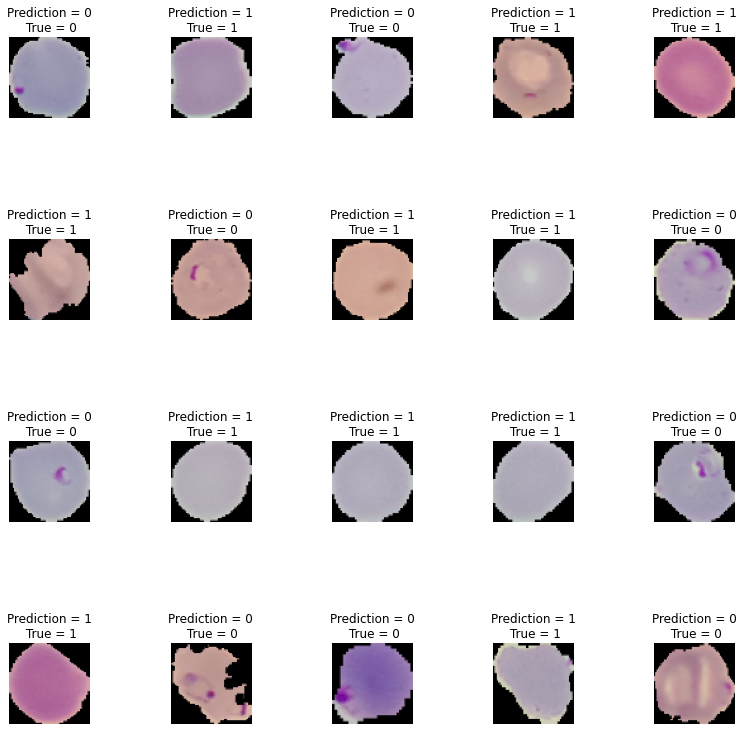

In [24]:
# Visualizing the test predictions

length = 4
width = 5

fig, ax = plt.subplots(length,width, figsize = (13,13))
ax = ax.ravel()
pred = model.predict(X_test, batch_size = batch_sizes)
for i in np.arange(0,length*width):
    ax[i].imshow(X_test[i])
    ax[i].set_title('Prediction = {}\n True = {}'.format(pred.argmax(axis =1)[i], y_test.argmax(axis =1)[i]))
    ax[i].axis('off')
plt.subplots_adjust(wspace = 1, hspace =1)    

In [25]:
#calculating the prediction accuracy and printing the classification report

y_prediction = model.predict(X_test)
y_prediction = np.argmax(y_prediction, axis = 1)
print(classification_report(y_test.argmax(axis = 1),
                            y_prediction, target_names = binarizer.classes_))

print(f'model accuracy = {accuracy_score(y_test.argmax(axis=1), y_prediction)*100}%')

              precision    recall  f1-score   support

     Malaria       0.98      0.94      0.96       200
      Normal       0.95      0.98      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

model accuracy = 96.25%


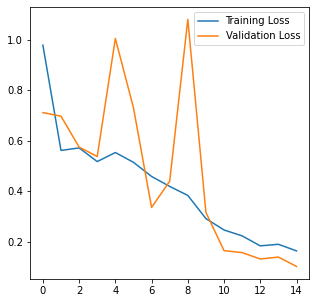

<Figure size 432x288 with 0 Axes>

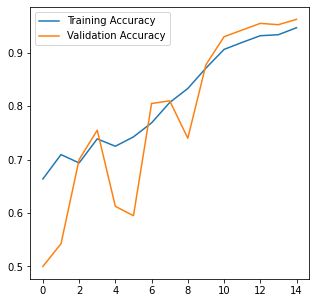

In [26]:
# plotting the training and validation loss and accuracy

# plotting loss
plt.figure(figsize = (5,5))
plt.plot(generator.history['loss'], label = 'Training Loss')
plt.plot(generator.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()
plt.savefig('training_validation_loss')

# plotting accuracy
plt.figure(figsize = (5,5))
plt.plot(generator.history['accuracy'], label = 'Training Accuracy')
plt.plot(generator.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

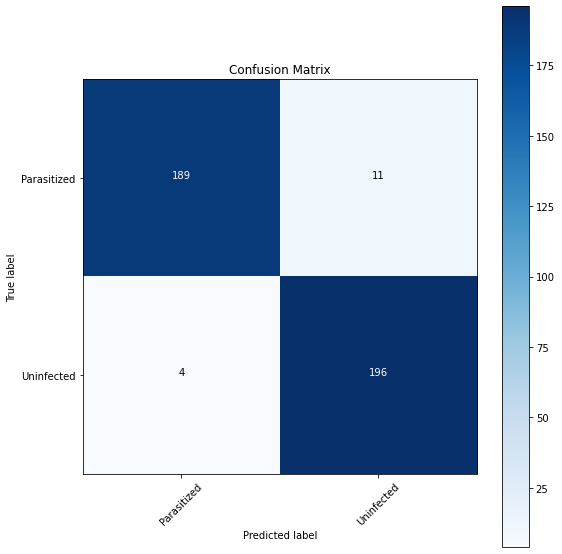

In [27]:

# creating a confusion matrix to visualize the model precision

labels = ['Infected','Uninfected']
cm = confusion_matrix(np.argmax(y_test, axis =1), y_prediction)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
      
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  
labels = ['Parasitized', 'Uninfected']
plot_confusion_matrix(cm, labels, title = 'Confusion Matrix')

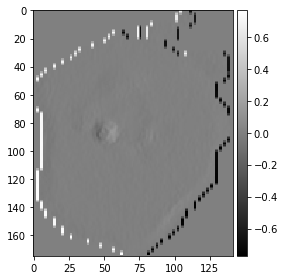

In [28]:
# Visualizing feature importance and feature borders 

from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v

image_1 = imread(r'C:\Users\animu\Downloads\malaria\Data\Malaria\C48P9thinF_IMG_20150721_160406_cell_235.png' 
, as_gray=True)

        #calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal_1 = prewitt_h(image_1)
        #calculating vertical edges using prewitt kernel
edges_prewitt_vertical_1 = prewitt_v(image_1)

imshow(edges_prewitt_vertical_1, cmap='gray')




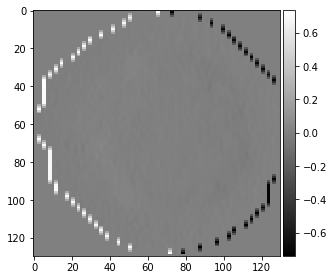

In [29]:
image_2 = imread(r'C:\Users\animu\Downloads\malaria\Data\Normal\C39P4thinF_original_IMG_20150622_105253_cell_61.png' , as_gray=True)

edges_prewitt_horizontal_2 = prewitt_h(image_2)
edges_prewitt_vertical_2 = prewitt_v(image_2)

imshow(edges_prewitt_vertical_2, cmap='gray')

In [14]:
# saving the model

# model.save(r'C:\Users\animu\Downloads\malaria\malaria_classifier.v3')